#1. EDA

In [ ]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Step 1.Load and Inspect Data

First, load the CSV file into a pandas DataFrame and inspect the first few rows to understand the structure of the data.

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/drive/MyDrive/FarmDataFinal(csv).csv')

# Display the first few rows of the dataframe
print(data.head())


   Water Level  Moisture Percentage  Light Intensity  Temperature  Humidity  \
0          270                76.05               36           27        68   
1          291                74.10               36           27        70   
2          297                73.70               36           27        71   
3          285                74.49               35           28        73   
4          303                73.22               36           28        71   

   Label  
0      0  
1      0  
2      0  
3      0  
4      0  


## Step 2. Descriptive Statistics
Calculate descriptive statistics for the numerical features to understand their central tendency, dispersion, and shape.

In [ ]:
# Get summary statistics
print(data.describe())


       Water Level  Moisture Percentage  Light Intensity  Temperature  \
count  6581.000000          6581.000000      6581.000000  6581.000000   
mean    702.916882            41.041355       484.773591    26.122018   
std      62.744570             7.535877       405.507870     1.312497   
min     270.000000            26.300000        32.000000    23.000000   
25%     678.000000            34.600000        60.000000    25.000000   
50%     712.000000            42.520000       465.000000    26.000000   
75%     741.000000            46.240000       822.000000    27.000000   
max     792.000000            76.050000      1001.000000    31.000000   

          Humidity        Label  
count  6581.000000  6581.000000  
mean     78.516183     0.486248  
std       7.016714     0.653260  
min      51.000000     0.000000  
25%      74.000000     0.000000  
50%      77.000000     0.000000  
75%      85.000000     1.000000  
max      90.000000     2.000000  


##Step 3. Data Visualization
Visualize the data to detect patterns, trends, and potential anomalies.

Histograms
Plot histograms for each feature to understand their distributions.

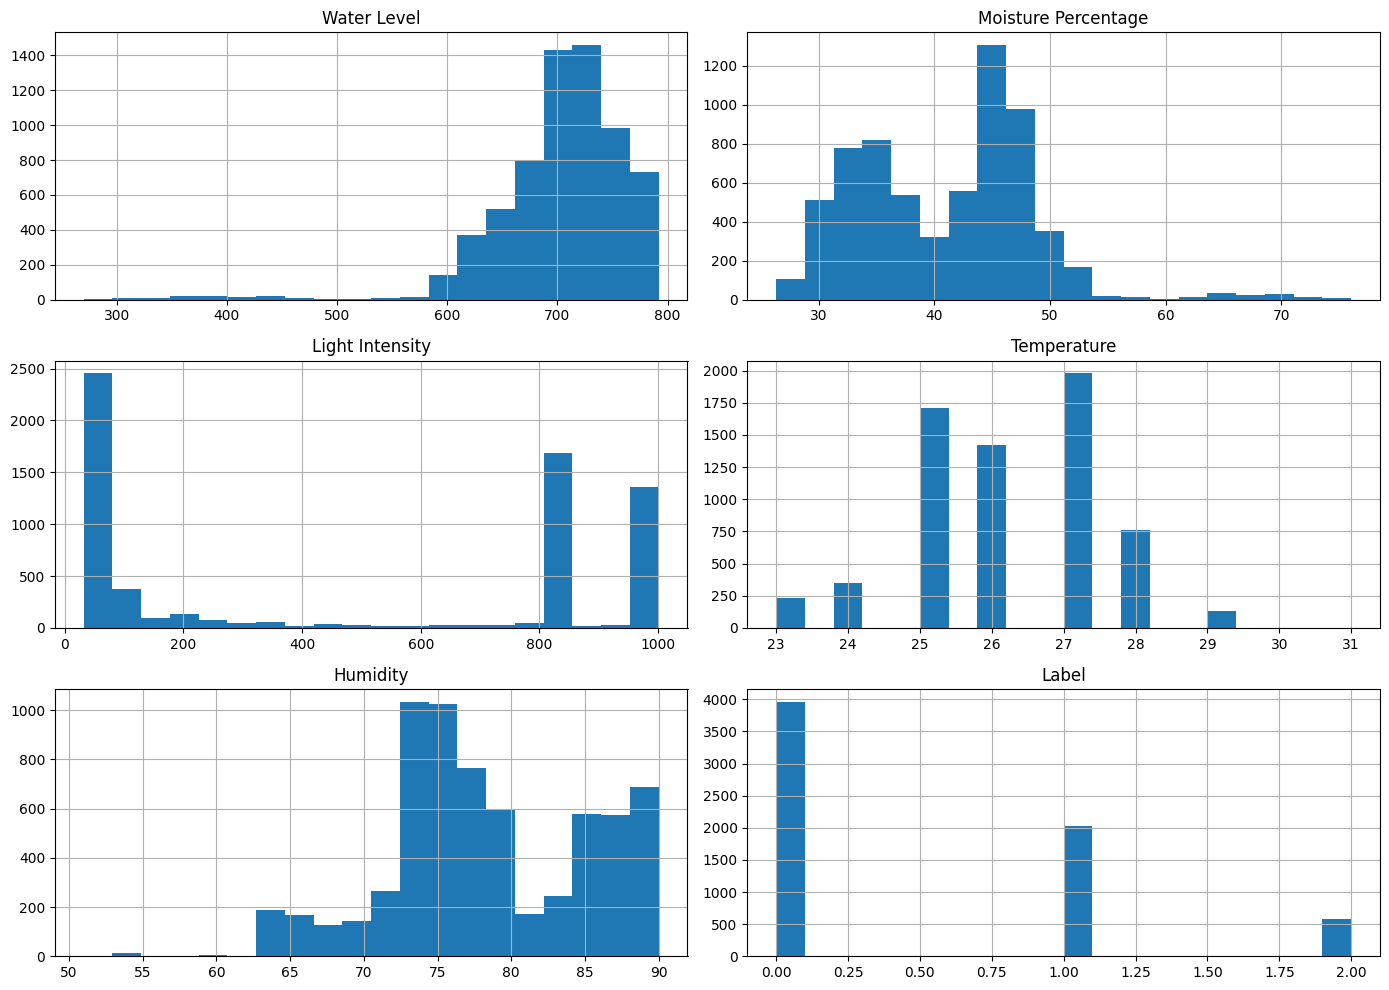

In [ ]:
import matplotlib.pyplot as plt

data.hist(bins=20, figsize=(14,10))
plt.tight_layout()
plt.show()


Box Plots

Use box plots to detect outliers and understand the spread of the data.

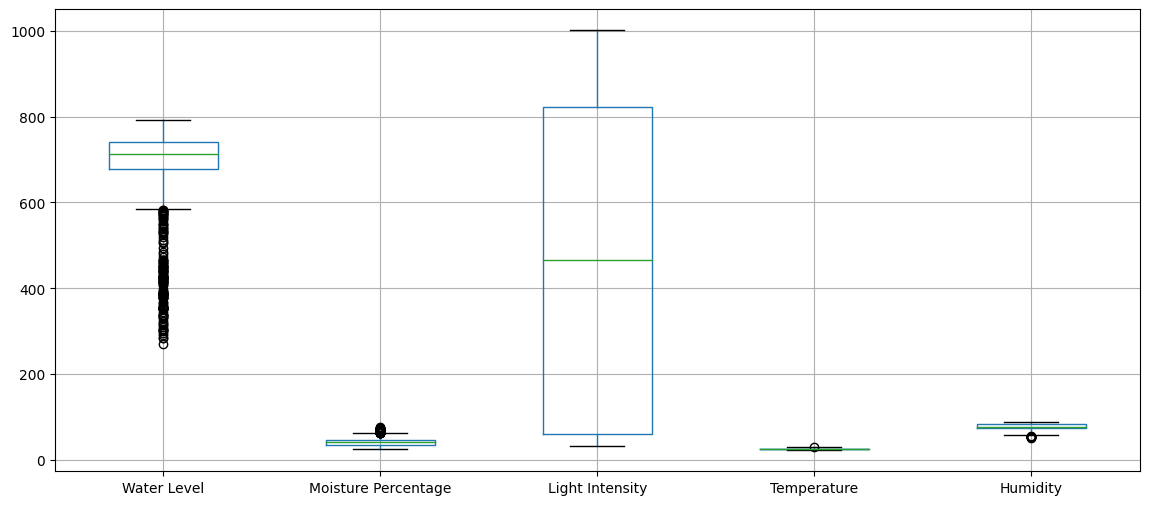

In [ ]:
# Plot box plots for each feature
data[['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']].boxplot(figsize=(14,6))
plt.show()


Pair Plot

Plot a pair plot to visualize relationships between features.

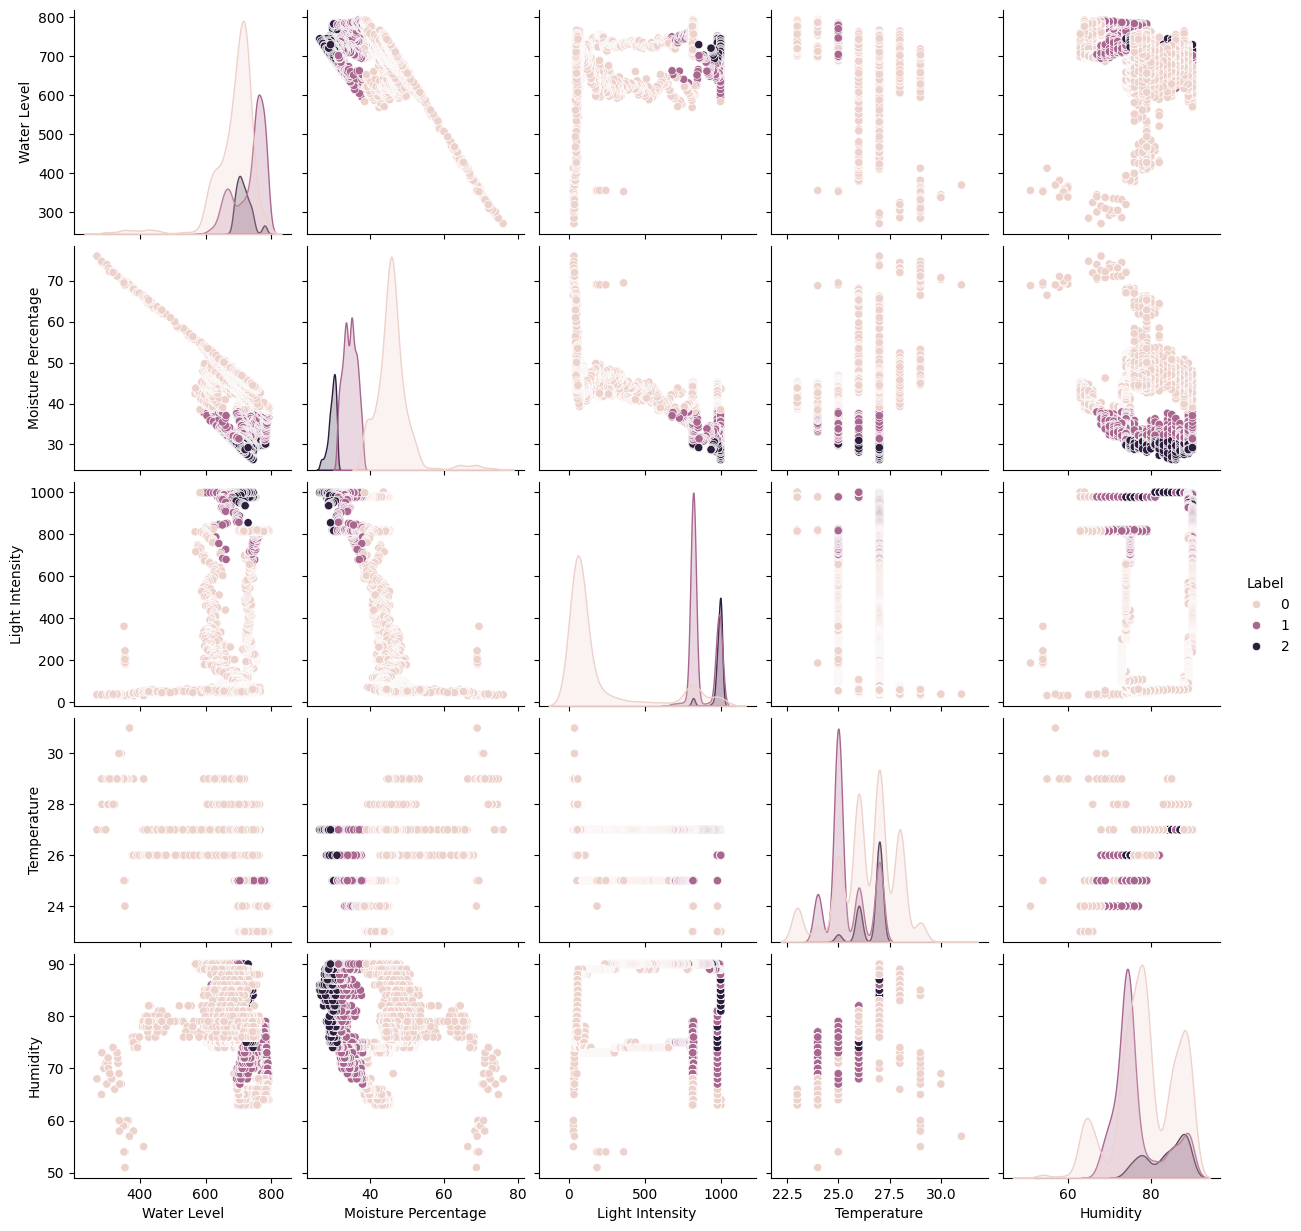

In [ ]:
import seaborn as sns

sns.pairplot(data, hue='Label')
plt.show()


Correlation Matrix

Compute and visualize the correlation matrix to understand the relationships between features.

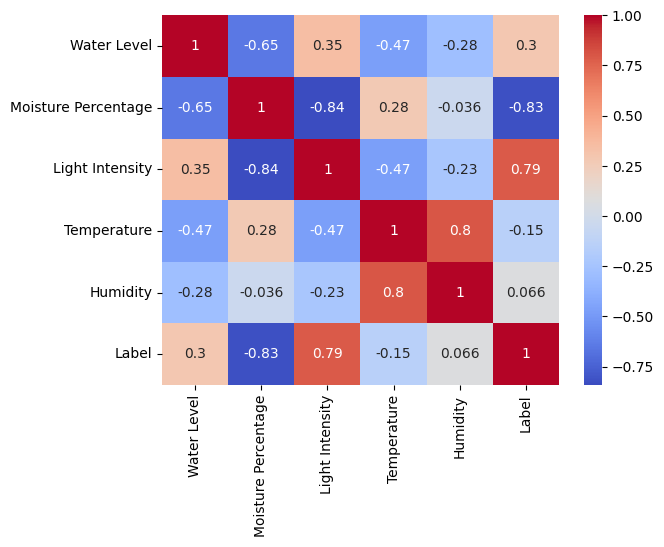

In [ ]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


##Label Distribution
Understand the distribution of the label to see if the data is balanced.

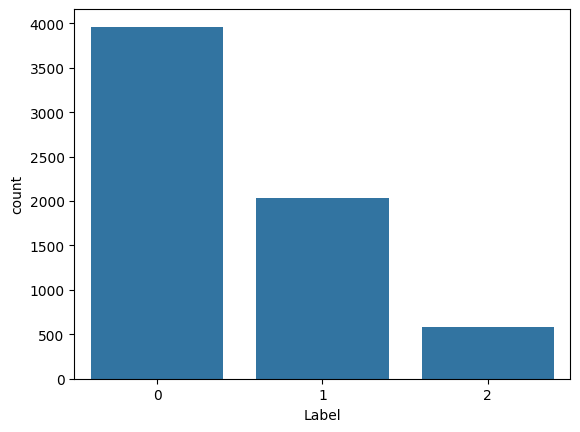

In [ ]:
# Plot the distribution of the label
sns.countplot(x='Label', data=data)
plt.show()


Summary of Findings
Summarize the key findings from the EDA:

Distribution of Features: Comment on the distributions observed in histograms.
Outliers: Note any outliers detected from box plots.
Relationships: Highlight significant relationships between features from the pair plot and correlation matrix.
Missing Values: Document how missing values were handled.
Label Distribution: Discuss if the data is balanced or if there is a need for resampling techniques.
Example Summary
From the exploratory data analysis, we observed that:

Water Level and Moisture Percentage have a relatively normal distribution, while Light Intensity and Temperature show some skewness.
Outliers were detected in the Humidity feature, which might require further investigation or handling.
Correlation Analysis revealed a strong positive correlation between Water Level and Moisture Percentage, which is expected as higher water levels generally correspond to higher soil moisture.
The dataset has a balanced distribution of labels, suggesting that no immediate resampling is necessary.
This EDA provides a solid foundation for proceeding to the data preprocessing and model building steps.







#Data Preprocessing
Prepare the data for modeling:

Handle Missing Values: Decide on a strategy to handle missing values (imputation, removal, etc.).
Normalization/Scaling: Normalize or scale features if necessary.
Encoding Labels: Ensure the label column is properly encoded (if not already).

##Step 1: Handle Missing Values
First, identify and handle any missing values in the dataset.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Example: Fill missing values with the mean of each column
data.fillna(data.mean(), inplace=True)


Water Level            0
Moisture Percentage    0
Light Intensity        0
Temperature            0
Humidity               0
Label                  0
dtype: int64


##Step 2: Encode Categorical Variables
Ensure that the label column is properly encoded. In this case, the label is already numeric, so no further encoding is needed.

##Step 3: Normalize/Scale Features
Normalize or scale the features to ensure that they are on a similar scale, especially if you are using models that are sensitive to feature scaling (e.g., K-Nearest Neighbors, SVM).

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of features to scale
features = ['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']

# Scale the features
data[features] = scaler.fit_transform(data[features])


##Step 4: Feature Engineering
Create new features if they could be beneficial for the model. For example, we can create an interaction feature between Water Level and Moisture Percentage.

In [ ]:
# Create an interaction feature
data['Water_Moisture_Interaction'] = data['Water Level'] * data['Moisture Percentage']


##Step 5: Split Data into Training and Testing Sets
Split the dataset into training and testing sets to evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and the target variable (y)
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Step 6: SMOTE
If the label distribution is imbalanced, consider using techniques such as oversampling, undersampling, or synthetic data generation (e.g., SMOTE).

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


##Step 7: Save Preprocessed Data
Save the preprocessed data for future use.

In [ ]:
# Save the preprocessed training and testing data
X_train_resampled.to_csv('X_train_resampled.csv', index=False)
y_train_resampled.to_csv('y_train_resampled.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)


##Summary of Data Preprocessing Steps
Handle Missing Values: Filled missing values with the mean of each column.
Encode Categorical Variables: Ensured the label column was properly encoded (numeric in this case).
Normalize/Scale Features: Standardized the features to have a mean of 0 and a standard deviation of 1.
Feature Engineering: Created an interaction feature (Water_Moisture_Interaction).
Split Data: Split the dataset into training and testing sets.
Handling Class Imbalance: Applied SMOTE to the training data to address class imbalance.
Save Preprocessed Data: Saved the preprocessed data for future use.
By following these preprocessing steps, the data is now ready for building and evaluating machine learning models.

#Feature Engineering
Enhance the dataset with additional useful features if necessary:

Interaction Features: Create new features by combining existing ones (e.g., Water Level * Moisture Percentage).

Temporal Features: If time-related data is available, consider creating features based on time.

Feature engineering is the process of creating new features from the existing ones to improve the performance of machine learning models. Here are some steps to perform feature engineering on the given dataset:

##Step 1: Create Interaction Features
Interaction features are created by combining two or more features. For example, the product of Water Level and Moisture Percentage.

In [ ]:
# Create interaction features
data['Water_Moisture_Interaction'] = data['Water Level'] * data['Moisture Percentage']
data['Water_Light_Interaction'] = data['Water Level'] * data['Light Intensity']
data['Moisture_Light_Interaction'] = data['Moisture Percentage'] * data['Light Intensity']


##Step 2: Create Polynomial Features
Polynomial features can be created to capture non-linear relationships.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Initialize polynomial features with degree 2
poly = PolynomialFeatures(degree=2, include_bias=False)

# Select features to transform
features = data[['Water Level', 'Moisture Percentage', 'Light Intensity', 'Temperature', 'Humidity']]

# Transform features
poly_features = poly.fit_transform(features)

# Create a DataFrame with polynomial features
poly_features_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(features.columns))

# Concatenate polynomial features with the original data
data = pd.concat([data, poly_features_df], axis=1)

# Drop duplicate columns created by polynomial features
data = data.loc[:,~data.columns.duplicated()]


##Step 3: Feature Selection
After creating new features, it's important to select the most relevant ones to avoid overfitting and reduce the complexity of the model. This can be done using methods like correlation analysis, feature importance from models, or dimensionality reduction techniques like PCA.

Feature Importance Using Random Forest

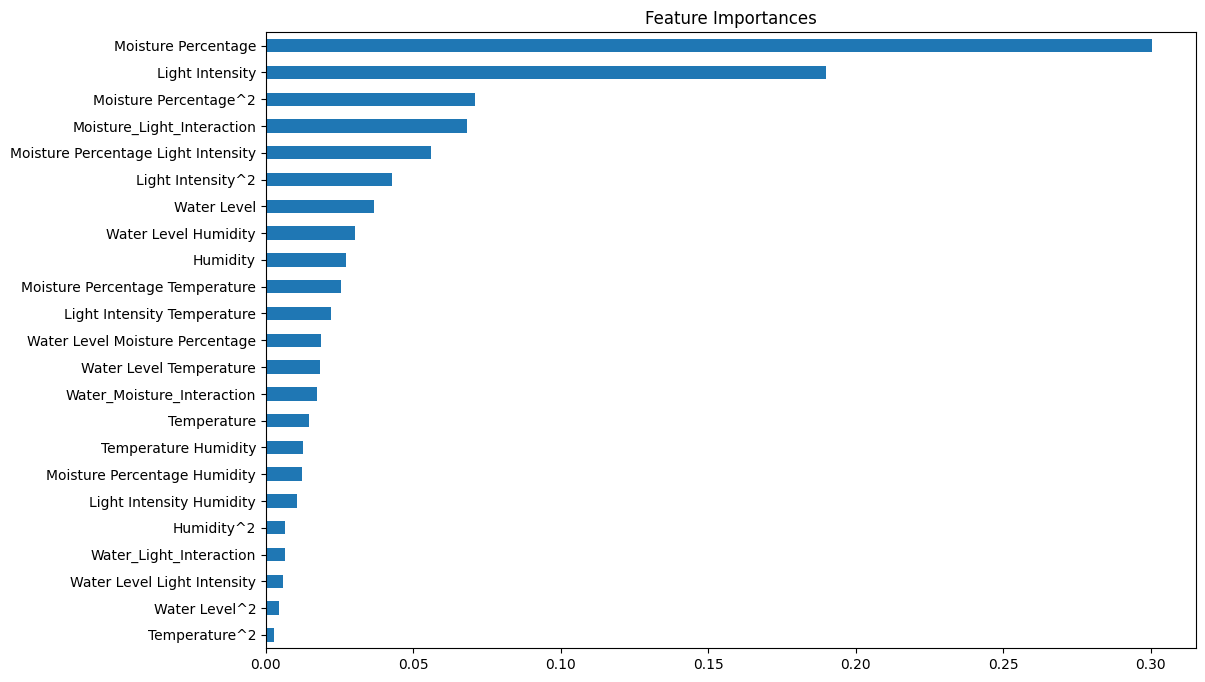

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define features (X) and the target variable (y)
X = data.drop('Label', axis=1)
y = data['Label']

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)

# Plot feature importances
feature_importances.sort_values().plot(kind='barh', figsize=(12, 8))
plt.title('Feature Importances')
plt.show()


In [ ]:
# Save the dataset with engineered features
data.to_csv('engineered_features_data.csv', index=False)


##Summary of Feature Engineering Steps
Create Interaction Features: Combined pairs of features to create new interaction features.
Create Polynomial Features: Generated polynomial features to capture non-linear relationships using PolynomialFeatures.
Feature Selection: Used Random Forest feature importances to identify the most relevant features.
Save the Engineered Features: Saved the dataset with the new features for future use.
By incorporating these steps, the dataset now includes additional informative features that can potentially enhance the performance of machine learning models.

#5. Model Building
Choose appropriate machine learning models to predict irrigation needs based on environmental conditions:

Split Data: Split the data into training and testing sets.
Model Selection: Consider multiple models such as Decision Trees, Random Forest, Support Vector Machines, or Neural Networks.
Training: Train the selected models on the training set.
Evaluation: Evaluate models using metrics like accuracy, precision, recall, F1-score, and confusion matrix.

A step-by-step approach for building and evaluating machine learning models using the preprocessed and feature-engineered dataset.

##Step 1: Load the Preprocessed Data
First, load the preprocessed data with the engineered features.

In [ ]:
import pandas as pd

# Load the data
data = pd.read_csv('/content/engineered_features_data.csv')

# Define features (X) and the target variable (y)
X = data.drop('Label', axis=1)
y = data['Label']


##Step 2: Split the Data into Training and Testing Sets
Split the dataset into training and testing sets to evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


##Step 3: Choose and Train Models
Train several machine learning models to compare their performance.

###Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression
Accuracy: 0.9901290812452543
Confusion Matrix:
 [[796   2   0]
 [  6 399   3]
 [  0   2 109]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       798
           1       0.99      0.98      0.98       408
           2       0.97      0.98      0.98       111

    accuracy                           0.99      1317
   macro avg       0.99      0.99      0.99      1317
weighted avg       0.99      0.99      0.99      1317



###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest
Accuracy: 1.0
Confusion Matrix:
 [[798   0   0]
 [  0 408   0]
 [  0   0 111]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       111

    accuracy                           1.00      1317
   macro avg       1.00      1.00      1.00      1317
weighted avg       1.00      1.00      1.00      1317



###Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Initialize and train the model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Support Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine
Accuracy: 0.9901290812452543
Confusion Matrix:
 [[798   0   0]
 [ 10 396   2]
 [  0   1 110]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       798
           1       1.00      0.97      0.98       408
           2       0.98      0.99      0.99       111

    accuracy                           0.99      1317
   macro avg       0.99      0.99      0.99      1317
weighted avg       0.99      0.99      0.99      1317



###Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb.predict(X_test)

# Evaluate the model
print("Gradient Boosting")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting
Accuracy: 1.0
Confusion Matrix:
 [[798   0   0]
 [  0 408   0]
 [  0   0 111]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       111

    accuracy                           1.00      1317
   macro avg       1.00      1.00      1.00      1317
weighted avg       1.00      1.00      1.00      1317



##Step 4: Hyperparameter Tuning
Use Grid Search or Random Search to optimize hyperparameters for the best-performing model.

###Randomized Search for Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the randomized search
random_search = RandomizedSearchCV(rf, param_grid, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train the Random Forest model with the best parameters
rf_optimized = RandomForestClassifier(**best_params, random_state=42)
rf_optimized.fit(X_train, y_train)

# Predict on the test set
y_pred_rf_optimized = rf_optimized.predict(X_test)

# Evaluate the optimized model
print("Optimized Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_optimized))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_optimized))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_optimized))


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}
Optimized Random Forest
Accuracy: 1.0
Confusion Matrix:
 [[798   0   0]
 [  0 408   0]
 [  0   0 111]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       111

    accuracy                           1.00      1317
   macro avg       1.00      1.00      1.00      1317
weighted avg       1.00      1.00      1.00      1317



##Step 5: Model Evaluation and Selection
Based on the evaluation metrics (accuracy, confusion matrix, classification report), choose the best-performing model.

##Step 6: Save the Model
Save the selected model for future use.

In [ ]:
import joblib

# Save the model
joblib.dump(rf_optimized, 'best_model.pkl')


['best_model.pkl']

##Summary of Model Building Steps
Load the Preprocessed Data: Load the dataset with engineered features.
Split the Data: Split the data into training and testing sets.
Train Models: Train several models (Logistic Regression, Random Forest, SVM, Gradient Boosting) and evaluate their performance.
Hyperparameter Tuning: Optimize hyperparameters for the best-performing model using Randomized Search.
Model Evaluation and Selection: Evaluate models and select the best-performing one based on performance metrics.
Save the Model: Save the trained model for future use.
By following these steps, we can build and evaluate machine learning models to predict irrigation needs effectively.

#6. Model Tuning
Optimize the models to improve performance:

Hyperparameter Tuning: Use techniques like Grid Search or Random Search for tuning hyperparameters.

Cross-Validation: Implement cross-validation to ensure the model’s robustness and to avoid overfitting.

Model tuning is an essential step to improve the performance of machine learning models by finding the optimal hyperparameters. Let's tune the Random Forest model using RandomizedSearchCV for efficiency and then validate the performance of the tuned model.

##Step-by-Step Model Tuning

##Step 1: Define the Hyperparameter Grid
Define the hyperparameter grid to search over. Here we include a range of values for several key hyperparameters of the Random Forest model.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}


##Step 2: Initialize RandomizedSearchCV
Initialize RandomizedSearchCV with the Random Forest classifier, the parameter grid, and other settings like the number of iterations, cross-validation strategy, and random state.

In [ ]:
# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf,
                                   param_distributions=param_grid,
                                   n_iter=100,  # Number of iterations
                                   cv=3,  # 3-fold cross-validation
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)  # Use all available CPUs


##Step 3: Fit the Model with RandomizedSearchCV
Fit the RandomizedSearchCV model on the training data to find the best hyperparameters.

In [ ]:
# Fit the random search model
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

##Step 4: Get the Best Hyperparameters
Retrieve the best hyperparameters from the random search and print them.

In [ ]:
# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}


##Step 5: Train the Optimized Model
Train a new Random Forest model using the best hyperparameters obtained from RandomizedSearchCV.

In [ ]:
# Train the Random Forest model with the best parameters
rf_optimized = RandomForestClassifier(**best_params, random_state=42)
rf_optimized.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, max_features='log2', min_samples_split=5,
                       n_estimators=400, random_state=42)

##Step 6: Evaluate the Optimized Model
Evaluate the optimized model on the test set using accuracy, confusion matrix, and classification report.

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred_rf_optimized = rf_optimized.predict(X_test)

# Evaluate the optimized model
print("Optimized Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf_optimized))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_optimized))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_optimized))


Optimized Random Forest
Accuracy: 1.0
Confusion Matrix:
 [[798   0   0]
 [  0 408   0]
 [  0   0 111]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       798
           1       1.00      1.00      1.00       408
           2       1.00      1.00      1.00       111

    accuracy                           1.00      1317
   macro avg       1.00      1.00      1.00      1317
weighted avg       1.00      1.00      1.00      1317



##Summary of Model Tuning Steps
Define the Hyperparameter Grid: Specify a range of values for each hyperparameter.
Initialize RandomizedSearchCV: Set up the random search with the model, parameter grid, and other settings.
Fit the Model: Run the random search on the training data.
Retrieve the Best Hyperparameters: Print the best hyperparameters found by the random search.
Train the Optimized Model: Use the best hyperparameters to train a new model.
Evaluate the Optimized Model: Assess the model's performance on the test set.
Save the Model: Save the tuned model for future use.
By following these steps, you can optimize the Random Forest model to achieve better performance on predicting irrigation needs.

#7. Model Interpretation
Understand the importance of different features and the decision-making process of the model:

Feature Importance: Determine which features are most influential in predicting the labels.
Model Interpretation Tools: Use tools like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) for model interpretation.

Interpreting a machine learning model is crucial to understand the decision-making process and to ensure the model is trustworthy and fair. Here’s how to interpret the Random Forest model we tuned:

##Step-by-Step Model Interpretation

##Step 1: Feature Importance
Random Forest models provide a straightforward way to interpret feature importance, which indicates how important each feature is in making predictions.

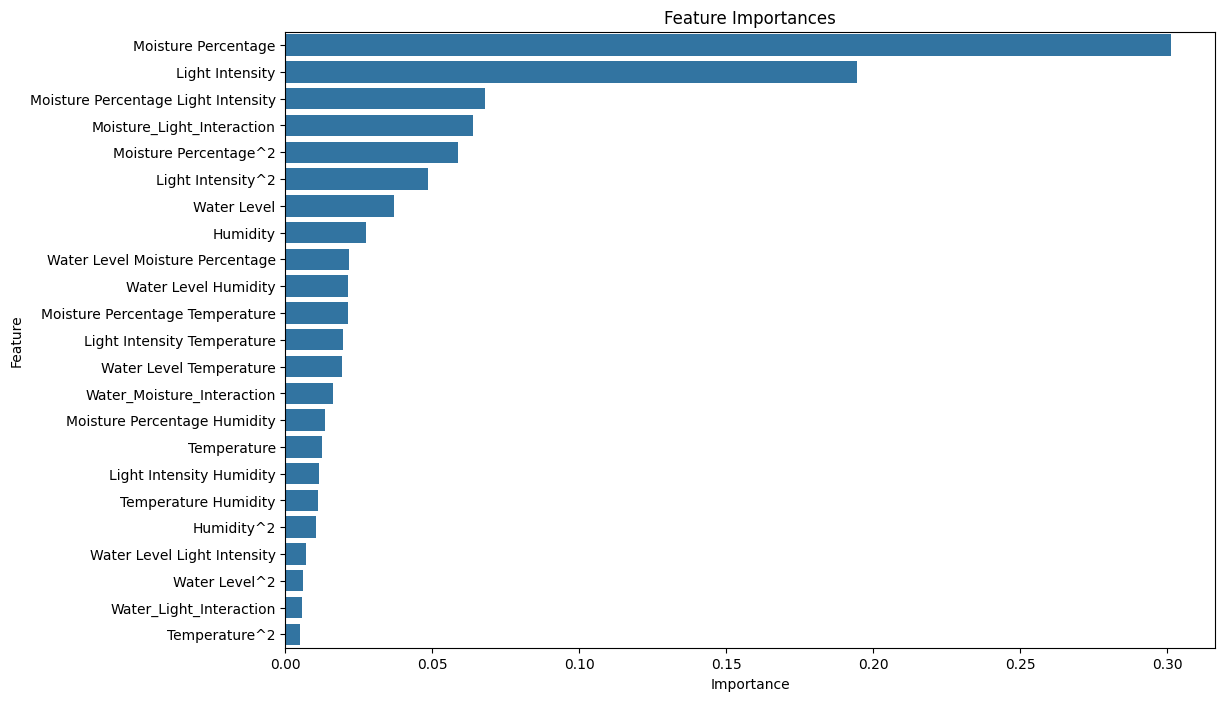

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Load the data and model
data = pd.read_csv('engineered_features_data.csv')
rf_optimized = joblib.load('best_model.pkl')

# Define features (X) and the target variable (y)
X = data.drop('Label', axis=1)
y = data['Label']

# Get feature importances
feature_importances = rf_optimized.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


##Step 2: Partial Dependence Plots (PDP)
Partial Dependence Plots show the relationship between a feature and the predicted outcome, marginalizing over the other features.

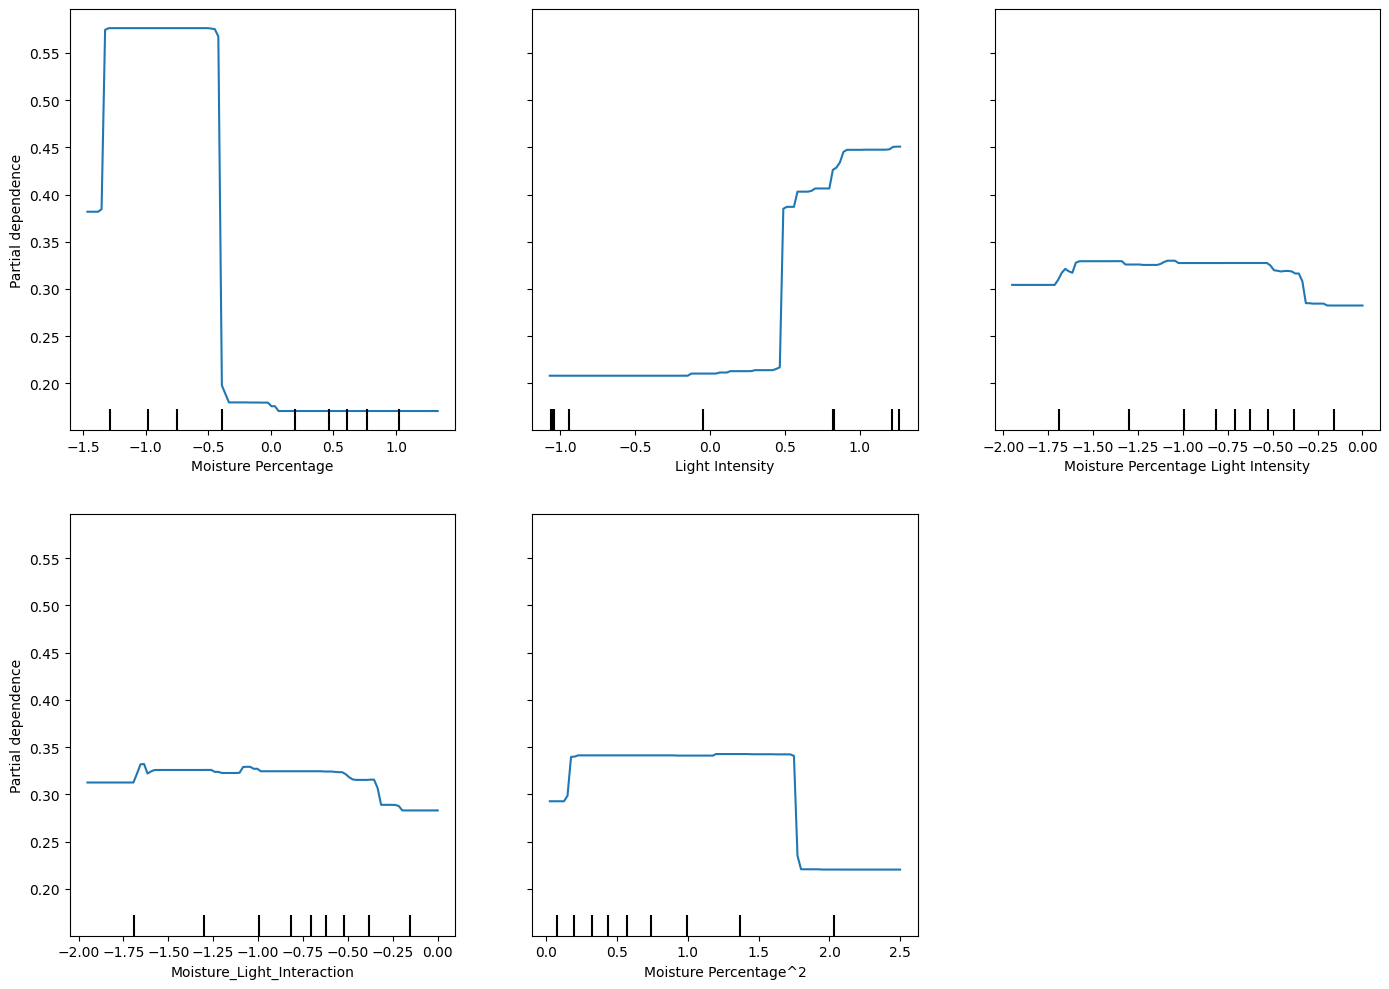

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
# Partial Dependence Plots for the target class 1 (you can change to 0 or 2 as needed)
top_features = importance_df['Feature'].head(5).tolist()
fig, ax = plt.subplots(figsize=(14, 10))
PartialDependenceDisplay.from_estimator(rf_optimized, X, features=top_features, target=1, ax=ax)
plt.tight_layout()
plt.show()


##Step 3: Tree Interpreter
The tree interpreter can help explain individual predictions by showing how each feature contributes to the final prediction.

In [ ]:
!pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti

# Select a sample from the test set for interpretation
sample_idx = 0
X_sample = X_test.iloc[sample_idx].values.reshape(1, -1)
y_sample = y_test.iloc[sample_idx]

# Get the prediction, bias (base value), and contributions
prediction, bias, contributions = ti.predict(rf_optimized, X_sample)

# Print the results
print(f"Prediction: {prediction}")
print(f"Actual Value: {y_sample}")
print("Bias (base value):", bias)
print("Feature Contributions:")
for feature, contribution in zip(features, contributions[0]):
    print(f"{feature}: {contribution}")


Prediction: [[1. 0. 0.]]
Actual Value: 0
Bias (base value): [[0.60170403 0.30894567 0.0893503 ]]
Feature Contributions:
Water Level: [ 0.01845901 -0.01992582  0.00146681]
Moisture Percentage: [ 0.11457807 -0.09140577 -0.02317231]
Light Intensity: [ 0.1435286  -0.11527073 -0.02825787]
Temperature: [-0.00901753  0.01154158 -0.00252405]
Humidity: [-0.00625942  0.00727484 -0.00101541]
Water_Moisture_Interaction: [ 0.01386276 -0.01364679 -0.00021597]
Water_Light_Interaction: [ 1.36729357e-03 -1.32196190e-03 -4.53316755e-05]
Moisture_Light_Interaction: [ 0.007296    0.00047056 -0.00776656]
Water Level^2: [ 2.66293067e-03 -2.63377615e-03 -2.91545190e-05]
Water Level Moisture Percentage: [ 8.97712509e-03 -8.93703755e-03 -4.00875384e-05]
Water Level Light Intensity: [ 0.00230953 -0.0021519  -0.00015763]
Water Level Temperature: [ 0.01433191 -0.01543705  0.00110514]
Water Level Humidity: [ 0.01857836 -0.02246567  0.00388731]
Moisture Percentage^2: [ 0.00318709  0.00240208 -0.00558917]
Moisture P

##Step 4: SHAP (SHapley Additive exPlanations)
SHAP values provide a unified measure of feature importance and can explain individual predictions.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 5.8 MB/s eta 0:00:00


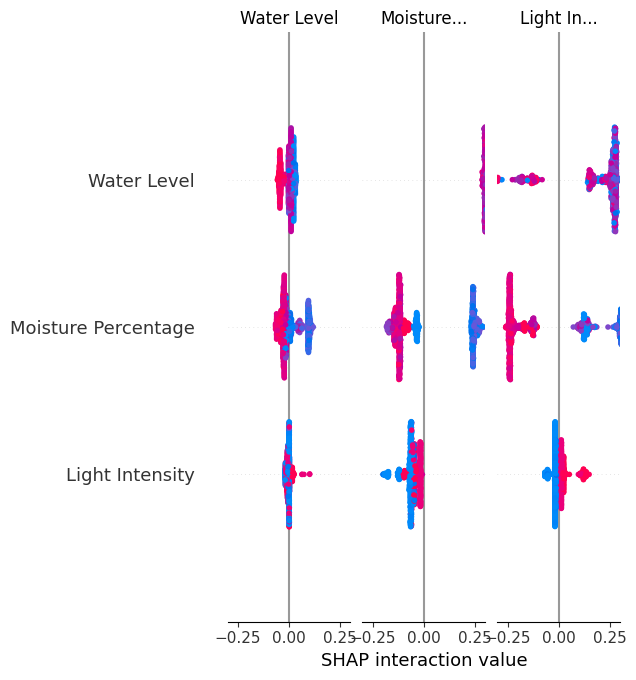

Feature length: 23
SHAP value length: 3


DimensionError: Length of features is not equal to the length of shap_values!

In [ ]:
!pip install shap
import shap

# SHAP Values
explainer = shap.TreeExplainer(rf_optimized)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# SHAP Force Plot for a single prediction
X_sample = X_test.iloc[sample_idx]
expected_value = explainer.expected_value[1]
shap_value = shap_values[1][sample_idx]

# Verify dimensions
print(f"Feature length: {len(X_sample)}")
print(f"SHAP value length: {len(shap_value)}")

# Plot SHAP values for a single prediction
shap.force_plot(expected_value, shap_value, X_sample, matplotlib=True)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay
from treeinterpreter import treeinterpreter as ti
import shap
import joblib

# Load the data and model
data = pd.read_csv('engineered_features_data.csv')
rf_optimized = joblib.load('best_model.pkl')

# Define features (X) and the target variable (y)
X = data.drop('Label', axis=1)
y = data['Label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Importance
feature_importances = rf_optimized.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()

# Partial Dependence Plots for the target class 1 (you can change to 0 or 2 as needed)
top_features = importance_df['Feature'].head(5).tolist()
fig, ax = plt.subplots(figsize=(14, 10))
PartialDependenceDisplay.from_estimator(rf_optimized, X, features=top_features, target=1, ax=ax)
plt.tight_layout()
plt.show()

# Tree Interpreter
sample_idx = 0
X_sample = X_test.iloc[sample_idx].values.reshape(1, -1)
y_sample = y_test.iloc[sample_idx]

prediction, bias, contributions = ti.predict(rf_optimized, X_sample)

print(f"Prediction: {prediction}")
print(f"Actual Value: {y_sample}")
print("Bias (base value):", bias)
print("Feature Contributions:")
for feature, contribution in zip(features, contributions[0]):
    print(f"{feature}: {contribution}")

# SHAP Values
explainer = shap.TreeExplainer(rf_optimized)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

# SHAP Force Plot for a single prediction
expected_value = explainer.expected_value[1]  # SHAP base value for class 1
shap_value = shap_values[1][sample_idx]  # SHAP values for class 1
X_sample = X_test.iloc[sample_idx]

# Verify dimensions
print(f"Feature length: {len(X_sample)}")
print(f"SHAP value length: {len(shap_value)}")

# Plot SHAP values for a single prediction
shap.force_plot(expected_value, shap_value, X_sample, matplotlib=True)
plt.show()


In [ ]:
import numpy as np

print("Shape of shap_values:", np.shape(shap_values))
print("Shape of X_sample:", np.shape(X_sample))


In [ ]:
import shap
import matplotlib.pyplot as plt

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(rf_optimized)

# Calculate SHAP values for all classes
shap_values = explainer.shap_values(X_test)

# Select an instance for visualization
sample_idx = 0
X_sample = X_test.iloc[sample_idx]

# Select SHAP values and expected value for class 1 (assuming binary classification or focus on one class)
class_idx = 1  # Change this to 0, 1, or 2 depending on the class you are interested in
expected_value = explainer.expected_value[class_idx]
shap_value = shap_values[:, :, class_idx]  # SHAP values for the selected class

# Reshape the feature array to match the shape of the SHAP values
X_sample_reshaped = X_sample.values.reshape(1, -1)

# Verify dimensions
print(f"Feature array shape: {X_sample_reshaped.shape}")
print(f"SHAP value shape: {shap_value.shape}")

# Plot SHAP values for a single prediction
shap.force_plot(expected_value, shap_value[sample_idx], X_sample_reshaped, matplotlib=True)
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import shap

# Step 1: Load the data
# url = ""
data = pd.read_csv('/content/drive/MyDrive/FarmDataFinal(csv).csv')

# Step 2: Data preprocessing
X = data.drop(columns=["Label"])
y = data["Label"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train and evaluate multiple models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Evaluating {name}...")
    print(classification_report(y_test, y_pred))

# Step 4: Explain model predictions (using the Random Forest model for demonstration)
explainer = shap.Explainer(models["Random Forest"], X_train)
shap_values = explainer.shap_values(X_test, check_additivity=False)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [ ]:
!pip install lime

In [ ]:
# Import libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Replace with your model
from lime import lime_tabular  # Example interpretability technique

# Load data
data = pd.read_csv('/content/drive/MyDrive/FarmDataFinal(csv).csv')
X = data.drop("Label", axis=1)  # Features
y = data["Label"]  # Target variable

# Train model (replace with your training pipeline)
model = RandomForestClassifier()
model.fit(X, y)

# Explanation function (replace with your chosen technique)
def explain_instance(model, explainer, instance):
    exp = explainer.explain_instance(instance, model.predict_proba)
    return exp.as_list()

# Example usage - get explanation for a specific data point
explainer = lime_tabular.LimeTabularExplainer(X.values, feature_names=X.columns)
instance = X.iloc[0]  # Pick an instance to explain
explanation = explain_instance(model, explainer, instance)
print(explanation)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import lime
import lime.lime_tabular

# Load the dataset (replace with your actual data loading process)
df = pd.read_csv('/content/engineered_features_data.csv')

# Define features and target
X = df.drop('Label', axis=1)
y = df['Label']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Preserve 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_classifier.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", rf_accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# Apply LIME for model interpretation
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=df.columns[:-1],
    class_names=['Irrigation Not Needed', 'Irrigation Needed Soon', 'Immediate Irrigation Needed'],
    mode='classification'
)

# Select an instance to explain
i = 0  # Example index of the instance you want to explain
exp = explainer.explain_instance(X_test[i], rf_classifier.predict_proba, num_features=5)

# Show the explanation
exp.show_in_notebook(show_table=True)

# Save the explanation as an HTML file (optional)
exp.save_to_file('lime_rf_explanation.html')


##Summary of Model Interpretation Steps
Feature Importance: Identify and plot the importance of each feature in the model.
Partial Dependence Plots (PDP): Visualize the relationship between top features and the prediction.
Tree Interpreter: Break down individual predictions to show how each feature contributes.
SHAP Values: Use SHAP to provide detailed insights into feature importance and individual predictions.
By following these steps, we gained a deep understanding of your Random Forest model's decision-making process and ensure it is making reasonable predictions.